#### MACHINE LEARNING EXERCISE: CLASSIFICATION
# PIMA INDIANS DIABETES

#### Models
* Logistic Regression
* Naive Bayes
* Random Forest Classifier

#### About
* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Target Variable
* Outcome: 0 (no diabetes) or 1 (has diabetes)

#### Features
1. Pregnancies - Number of times pregnant
1. Glucose - Plasma glucose concentration
1. BloodPressure - Diastolic blood pressure (mm Hg)
1. SkinThickness - Triceps skin fold thickness (mm)
1. Insulin - 2-Hour serum insulin (mu U/ml)
1. BMI - Body mass index
1. DiabetesPedigreeFunction
1. Age

#### Source
* https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
##### Other Libraries #####

## ML Algorithms ##
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [3]:
### Load the data
df = pd.read_csv("diabetes.csv")

### Check if the data is properly loaded
print("Size of the dataset:", df.shape)
df.head()

Size of the dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The shape of the loaded dataset is same as what is specified by the source, so we're good to go!

For further inspection, shown below is the list of columns of the data along with its count and type.

In [4]:
### List the columns along with its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


## Explore the Dataset

In [5]:
### Summary of statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The table above summarizes the common statistics stuff we can compute from the data.

By observing the row `count`, we can confirm that there is no missing data.

But if we look at the `min` row, there are columns with zero values that are not expected to have zero values. These columns are `Glucose`, `BloodPressure`, `SkinThickness` and `BMI`. Imagine meeting someone having zero of these attributes, it means that person is a ghost.

In [6]:
### Display the number of zero values per columns 
print("---Count zero values per column---")

for col in ["Glucose", "BloodPressure", "SkinThickness", "BMI"]:
    print("{}: {}".format( col, df[col].value_counts()[0] ))
    
    
### Print the percentage of rows with zero values
print("\n---Rows with zero values in %---")

print("% of rows with zero values in all columns listed above:", 
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) | 
          (df["BMI"]==0) | (df["SkinThickness"]==0)].shape[0] / df.shape[0]) * 100)

print("% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI':", 
      (df[(df["Glucose"]==0) | (df["BloodPressure"]==0) | 
          (df["BMI"]==0)].shape[0] / df.shape[0]) * 100)

---Count zero values per column---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11

---Rows with zero values in %---
% of rows with zero values in all columns listed above: 30.729166666666668
% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI': 5.729166666666666


We can remove rows with zero values in columns `Glucose`, `BloodPressure` or `BMI` since these rows are just around 6% of the data. While, we can impute values for `SkinThickness` because we don't want 30% of our data to be thrown away.

### Relationships

Now, let's look at the correlation between the predictors.

In [7]:
### Determine correlation between variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


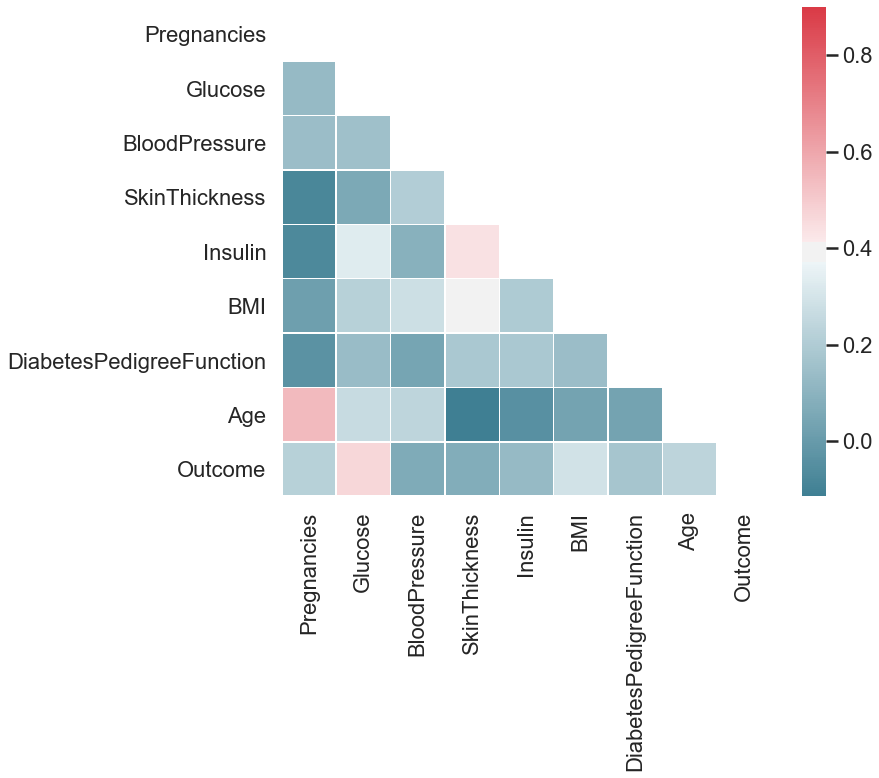

In [8]:
### Visualize Correlation

## Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

`Glucose` has the highest correlation with our target variable `Outcome`, followed by `BMI`. While, `BloodPressure` and `SkinThickness` has the lowest correlation. 

We can look more closely on the relationship of `Outcome` with the predictors using histograms, as shown below. The first histogram of the cell denotes when `Outcome==0 or non-diabetic` while the other one represents when `Outcome==1 or diabetic`. 

----- Outcome vs Pregnancies-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


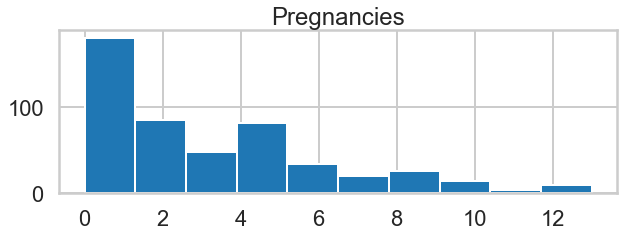

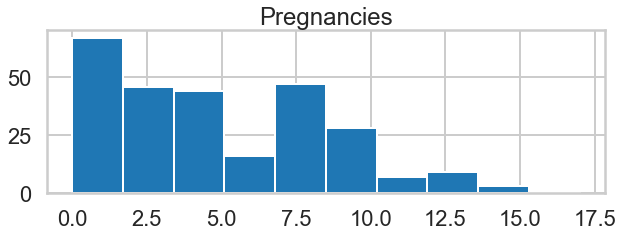

In [9]:
### Function to plot histogram
def histplt(col):
    print("----- Outcome vs {}-----".format(col))
    print(df[["Outcome", col]].groupby("Outcome").hist(figsize=(10,3)))
    
### Plot histogram for Outcome vs Pregnancies
histplt("Pregnancies")

The trend on the `Pregnancies` for both `Outcomes` seems similar, but if we look closely, the average pregnancies for `Outcome==1` seems higher.

----- Outcome vs Glucose-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


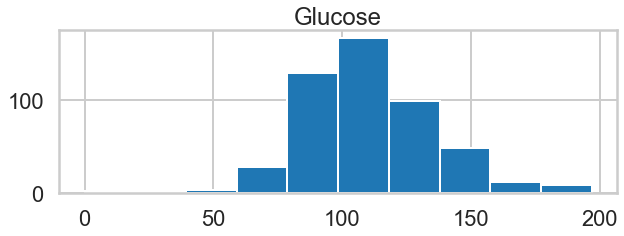

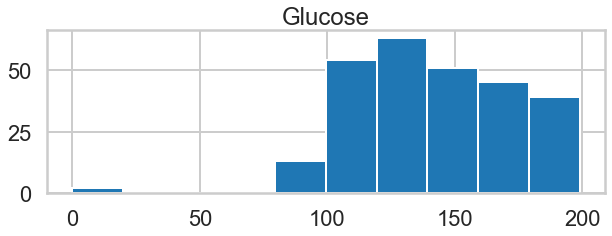

In [10]:
### Plot histogram for Outcome vs Glucose
histplt("Glucose")

As expected for `Glucose`, diabetic people has higher levels of it while non-diabetic people has the normal `Glucose` which is around 90-100.

----- Outcome vs BloodPressure-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


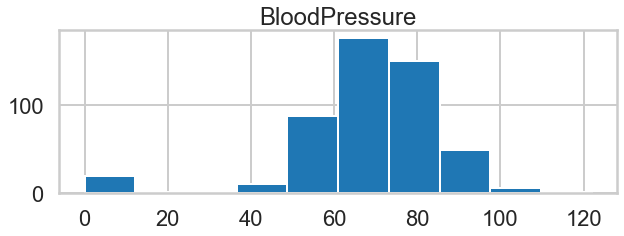

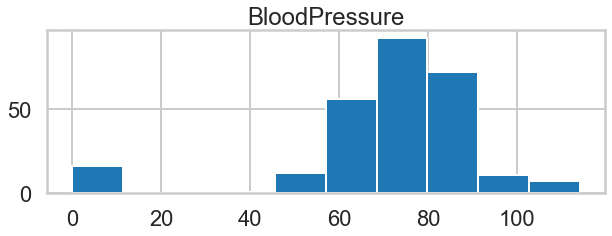

In [11]:
### Plot histogram for Outcome vs BloodPressure
histplt("BloodPressure")

The trends for`BloodPressure` look the same for diabetic and non-diabetic people.

----- Outcome vs SkinThickness-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


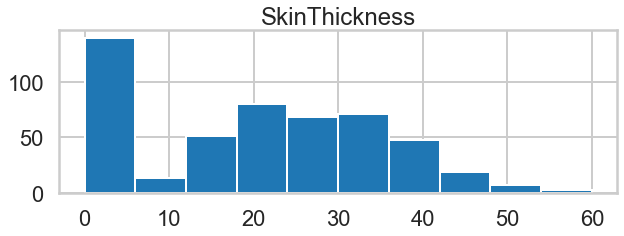

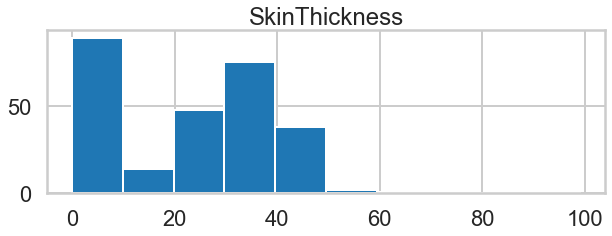

In [12]:
### Plot histogram for Outcome vs SkinThickness
histplt("SkinThickness")

The average `SkinThickness` of diabetic people looks slightly higher than non-diabetic people.

----- Outcome vs Insulin-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


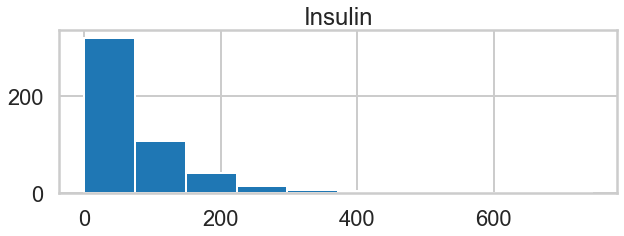

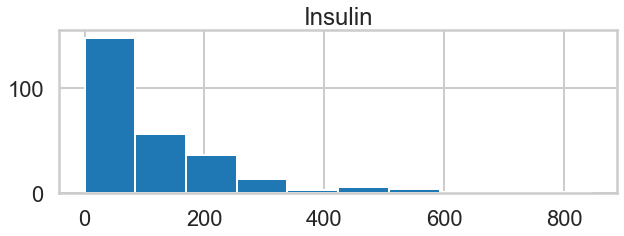

In [13]:
### Plot histogram for Outcome vs Insulin
histplt("Insulin")

Suprisingly, the `insulin` levels for both outcomes are pretty much the same, except that the range of values of `insulin` for non-diabetic people is smaller.

----- Outcome vs BMI-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


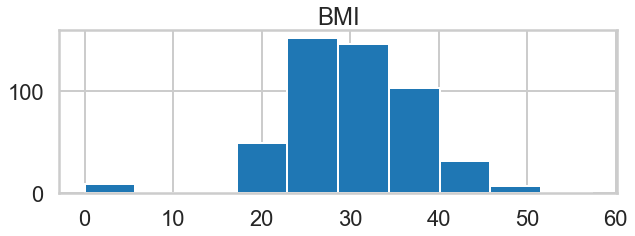

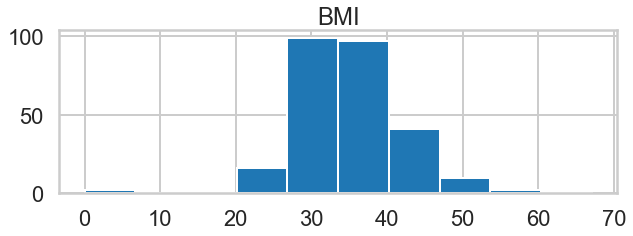

In [14]:
### Plot histogram for Outcome vs BMI
histplt("BMI")

Same with `SkinThickness`, the average `BMI` of diabetic people looks slightly higher than non-diabetic people.

----- Outcome vs DiabetesPedigreeFunction-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


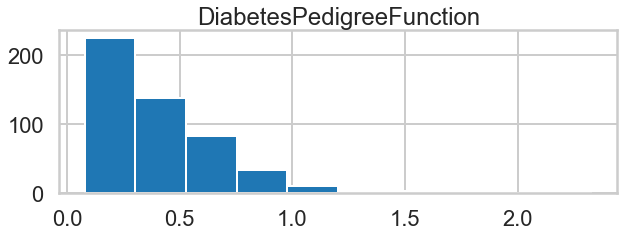

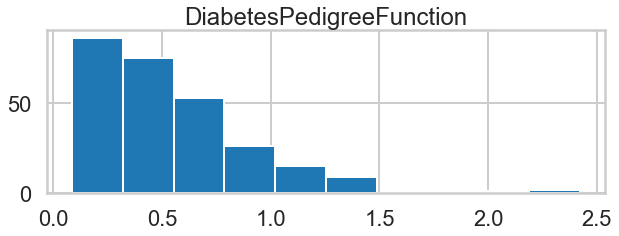

In [15]:
### Plot histogram for Outcome vs DiabetesPedigreeFunction
histplt("DiabetesPedigreeFunction")

The max and average `DiabetesPedigreeFunction`value of diabetic people is higher than that of the non-diabetics.

----- Outcome vs Age-----
Outcome
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object


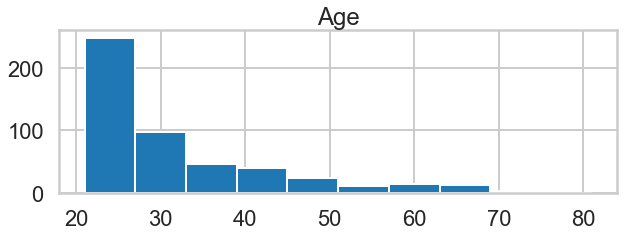

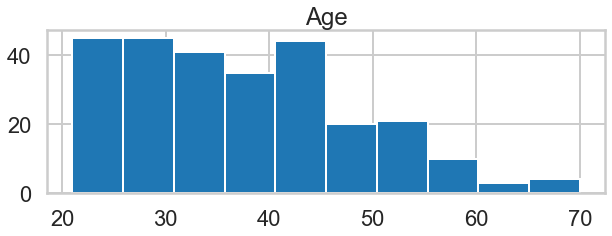

In [16]:
### Plot histogram for Outcome vs Age
histplt("Age")

Most of the non-diabetic people are in their 20s. The distribution of diabetic people with `Age` within the 20-40 is almost uniform, and there are also many diabetic people aged 50 and above.

Lastly, this data is imbalanced as usual. We can resample, but we will not do it for now. The value counts for each outcome is shown below.  

In [17]:
### Check how balanced / imbalanced the data is
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Prepare the Data for Modelling

### Handling Zero Values
##### Remove rows
As stated above, we can remove rows with zero values in columns `Glucose`, `BloodPressure` and `BMI`.

In [18]:
### Create new dataframe wherein the unwanted rows are not included
df_rem = df[ (df["Glucose"]!=0) & (df["BloodPressure"]!=0) & (df["BMI"]!=0) ]

### Check the new dataframe
print("Size of dataframe:", df_rem.shape)
df_rem.head()

Size of dataframe: (724, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
### Check minimum values of the new dataframe
df_rem.describe().loc["min"]

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                0.000
Insulin                      0.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

##### Impute
Since there are many rows with zero values in `SkinThickness`, we will use Linear Regression to change those values to non-zeroes.

In [20]:
### Separate rows that have zero value in SkinThickness from the rows that have value > 0
df_impute = df_rem[df_rem["SkinThickness"]!=0]
df_0 = df_rem[df_rem["SkinThickness"]==0]

### Use Linear Regression for imputation
## Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

## Fit the dataframe with SkinThickness > 0 on linreg
linreg.fit(df_impute.drop(["SkinThickness", "Outcome"], axis=1), df_impute["SkinThickness"])

## Get the new values of SkinThickness
df_0["SkinThickness"] = linreg.predict(df_0.drop(["SkinThickness","Outcome"], axis=1))

### Merge the imputed datas, then check
df_impute = df_impute.append(df_0)
df_impute.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.024005,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.683955,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.014105,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,35.004675,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Train-Test Split

In [21]:
### Seaprate the predictors from the target variable
X = df_impute.drop(["Outcome"], axis=1)
y = df_impute["Outcome"]

print("Size of x (predictors):\t{}\nSize of y (target):\t{}".format(X.shape, y.shape))

Size of x (predictors):	(724, 8)
Size of y (target):	(724,)


In [22]:
### Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Size of x_train: (506, 8) 	 Size of x_test: (218, 8) 
Size of y_train: (506,) 	 Size of y_test: (218,)


In [23]:
print(y_train.value_counts(), '\n', y_test.value_counts())

0    332
1    174
Name: Outcome, dtype: int64 
 0    143
1     75
Name: Outcome, dtype: int64


### Standard Scaler

In [24]:
### Instantiate the Standard Scaler
scaler = StandardScaler()

### Fit the scaler to the training set
scaler.fit(X_train)

### Transform the training set
X_train_scaled = scaler.transform(X_train)

### Transform the test set
X_test_scaled = scaler.transform(X_test)

In [25]:
### Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

## Build the Models

In [26]:
### Initialized for easy plotting of confusion matrix
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

### Logistic Regression

#### Build/Train the Model

In [48]:
### Instantiate the Algorithm 
logreg = LogisticRegression()

### Train/Fit the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Validate the Model

In [49]:
### Predict on the test set
logreg_pred = logreg.predict(X_test_scaled)

##### Classification Report

In [50]:
### Get performance metrics
logreg_score = metrics.accuracy_score(y_test, logreg_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg, metrics.classification_report(y_test, logreg_pred)))
print("Accuracy score:", logreg_score)

Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       143
           1       0.75      0.63      0.68        75

    accuracy                           0.80       218
   macro avg       0.78      0.76      0.77       218
weighted avg       0.79      0.80      0.79       218

Accuracy score: 79.81651376146789


The accuracy score and precision of this model is pretty good. Though, we still need to cross-validate this to know if this is luck or not.

Shown below is the confusion matrix.

##### Confusion Matrix

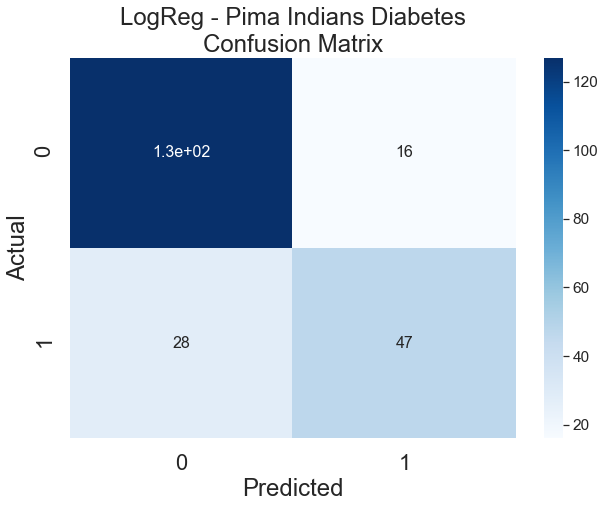

In [30]:
### Plot the confusion matrix
confmatrix(logreg_pred, "LogReg - Pima Indians Diabetes\nConfusion Matrix")

##### Cross-Validation

In [31]:
### Perform 10-fold cross-validation
logreg_cv = np.mean(cross_val_score(logreg, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", logreg_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.70119729028661


The results of cross-validation for logistic regression is also good, which proves that the accuracy score got previously for this model is not pure luck.

### Gaussian Naive Bayes

#### Build/Train the Model

In [32]:
### Instantiate the Algorithm 
gnb = GaussianNB()

### Train the model
gnb.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Validate the Model

In [33]:
### Predict on the Test Set
gnb_pred = gnb.predict(X_test_scaled)

##### Classification Report

In [34]:
### Get performance metrics
gnb_score = metrics.accuracy_score(y_test, gnb_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(gnb, metrics.classification_report(y_test, gnb_pred)))
print("Accuracy score:", gnb_score)

Classification report for GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       143
           1       0.69      0.65      0.67        75

    accuracy                           0.78       218
   macro avg       0.76      0.75      0.75       218
weighted avg       0.78      0.78      0.78       218

Accuracy score: 77.98165137614679


This model also gave good accuracy score. Its recall score is better than that of LogReg.

##### Confusion Matrix

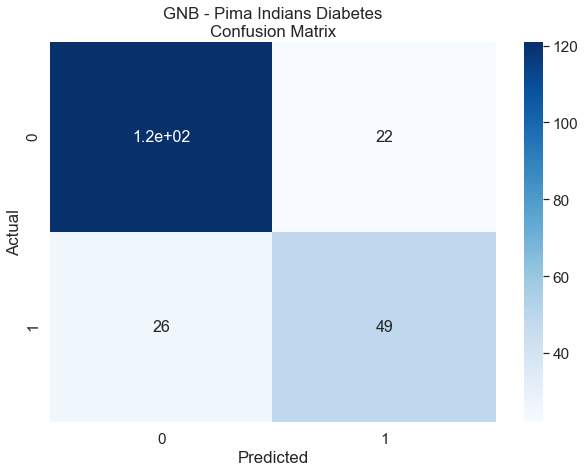

In [35]:
### Plot the confusion matrix
confmatrix(gnb_pred, "GNB - Pima Indians Diabetes\nConfusion Matrix")

##### Cross-Validation

In [36]:
### Perform cross-validation then get the mean
gnb_cv = np.mean(cross_val_score(gnb, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", gnb_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.0046894762793


### Random Forest Classifier

#### Build/Train the Model

In [37]:
### Instantiate algorithm
rf = RandomForestClassifier()

### Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Validate the Model

In [38]:
### Predict on the test set
rf_pred = rf.predict(X_test_scaled)

##### Classification Report

In [39]:
### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", rf_score)

Classification report for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       143
           1       0.67      0.52      0.59        75

    accuracy                           0.75       218
   macro avg       0.72      0.69      0.70       218
weighted avg       0.74      0.75      0.74       218

Accuracy score: 74.77064220183486


This Random Forest model got a decent accuracy score but not as good as the previous models. This also has the lowest recall score.

##### Confusion Matrix

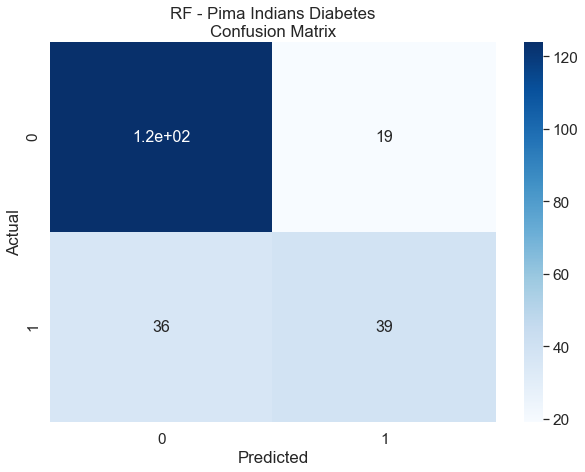

In [40]:
### Plot the confusion matrix
confmatrix(rf_pred, "RF - Pima Indians Diabetes\nConfusion Matrix")

##### Cross-Validation

In [43]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", rf_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.55263468175873


## Summary of the Results

In [44]:
df_results = pd.DataFrame.from_dict({
    'Accuracy Score':{'Logistic Regression':logreg_score, 'Gaussian Naive Bayes':gnb_score, 'Random Forest':rf_score},
    'Cross-Validation Score':{'Logistic Regression':logreg_cv, 'Gaussian Naive Bayes':gnb_cv, 'Random Forest':rf_cv}
    })
df_results

,Accuracy Score,Cross-Validation Score
Gaussian Naive Bayes,77.981651,75.004689
Logistic Regression,79.816514,75.701197
Random Forest,74.770642,75.552635


**We got good accuracy scores from all of the models, but not that good precision and recall for classifying people with diabetes.** One factor for this is the imbalance of data since more or less 65% of the subjects in the dataset have no diabetes. Also, there may be other predictors for diabetes that are not included in this dataset.

**Logistic Regression shows more promise.** This model does not only have the highest accuracy score and cross-validation score, it also has good precision of 75%. The f1-score of this model is 68%. 

While, **Naive Bayes has 65% recall which is better compared to the other models.**

Overall, more data and more fine tuning are needed.

## Special Thanks
* [FTW Foundation](https://ftwfoundation.org)